# Declaration of Originality

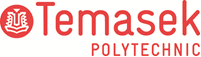

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Isaac Tan (2402193C)
* Tutorial Group                : PC02
* Tutor						    : Ester Goh
* Submission Date               : 11 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [212]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Business Understanding
Goal: The goal of this project is to build a model that predicts whether an individual is likely to have diabetes (Diabetes_binary = 1) using the available health, lifestyle, and demographic variables (such as HighBP, HighChol, BMI, PhysActivity, Age, Income and others). This is a binary classification problem where the output is either diabetic or not diabetic.

In a real life, this model supports early risk identification. Healthcare providers or public health agencies can use the predictions to prioritize screening, health education, and preventive interventions for people who are most at risk. This is helpful as early detection reduces the chances of long‑term complications such kidney disease, cardiovascular issues, etc. and lowers healthcare costs, while improving patient outcomes. Therefore, the business value comes from catching high risk cases earlier and allocating medical resources more effectively.

Because diabetes is costly to miss, recall for the positive class is a key success criterion. Missing a true diabetic case (false negative) means the person might not receive timely care. However, extremely low precision will cause too many false alarms and waste clinical resources. So the model should balance sensitivity with practicality.

# 2. Data Understanding

## 2.1 Load dataset

In [213]:
# Read *.csv file into pandas DataFrame
df = pd.read_csv('diabetes.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


## 2.2 Summary Statistics

In [214]:
## Understand the type of variable for each column
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [215]:
## Check for missing data
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [216]:
## Describe data distribution

print("Numerical Summary:")
display(df.describe())

Numerical Summary:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

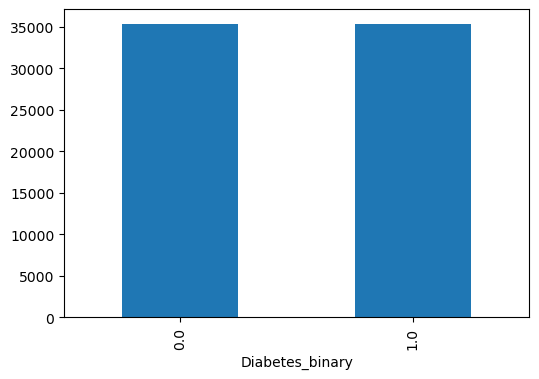

In [217]:
## Understanding distribution of target

plt.figure(figsize=(6,4))
df['Diabetes_binary'].value_counts().plot(kind='bar')
plt.show()

The target feature is perfectly balanced, which is good for model quality. 

### 2.3.1.2 Understanding distribution of features

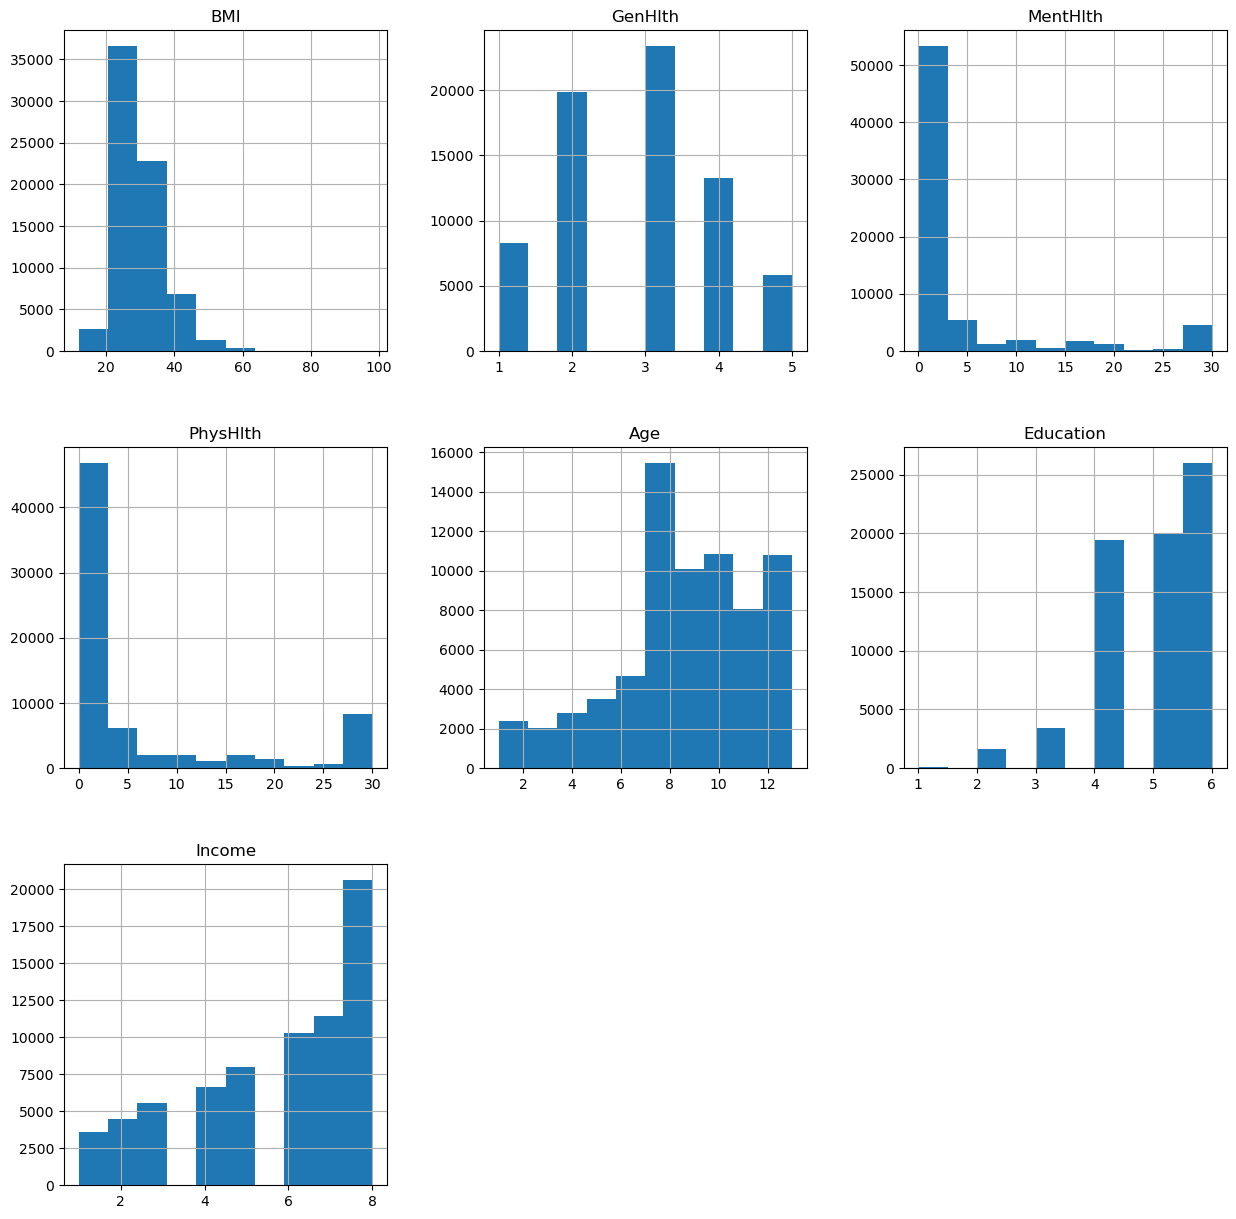

In [218]:
## Understanding distribution of features

# Since one hot encoding has already been applied to the dataset,
# we can split the numerical features into normal numerical data
# and binary data that only have 0 or 1 values.

cols = df.drop('Diabetes_binary', axis=1).columns.tolist()

# list comprehension
numerical_features = [
    col for col in cols
    if not set(df[col].unique()).issubset({0, 1})
]

binary_features = [
    col for col in cols
    if set(df[col].unique()).issubset({0, 1})
]

# Redoing the histograms for numerical features only
df[numerical_features].hist(figsize=(15,15))
plt.show()



Right-Skewed Distributions (BMI, MentHlth, PhysHlth):

BMI: Most records cluster between 20 and 40, with a long and small tail extending toward 100.

MentHlth & PhysHlth: These show a massive peak at the start of the graph, indicating most respondents report zero days of poor health, with a secondary smaller peak at the 30-day mark.

Multimodal distributions(GenHlth, Age, Education, Income):

GenHlth: Shows a roughly bell-shaped distribution across its five categories, centered around "Good" or "Very Good" (values 2 and 3).

Age: Skewed toward older populations, with significant density in categories 7 through 13.

Education & Income: These are heavily skewed toward higher values, suggesting the sample may be biased toward individuals with higher education levels and higher household income.

Outliers:
BMI: The values reaching toward 80–100 are biologically extreme. While they might be legitimate, they act as high leverage points that can disproportionately influence linear models.

Boundary Effects: The spikes at "30" for MentHlth and PhysHlth suggest a ceiling effect, where anyone experiencing issues for more than a month is capped at 30 days. This could be under representing their mental state, which could decrease model performance.

Sparse Data in Income/Education: The very low counts in the lower brackets (e.g., Education levels 1 and 2) mean the model will have very little evidence to learn the characteristics of those specific demographics.

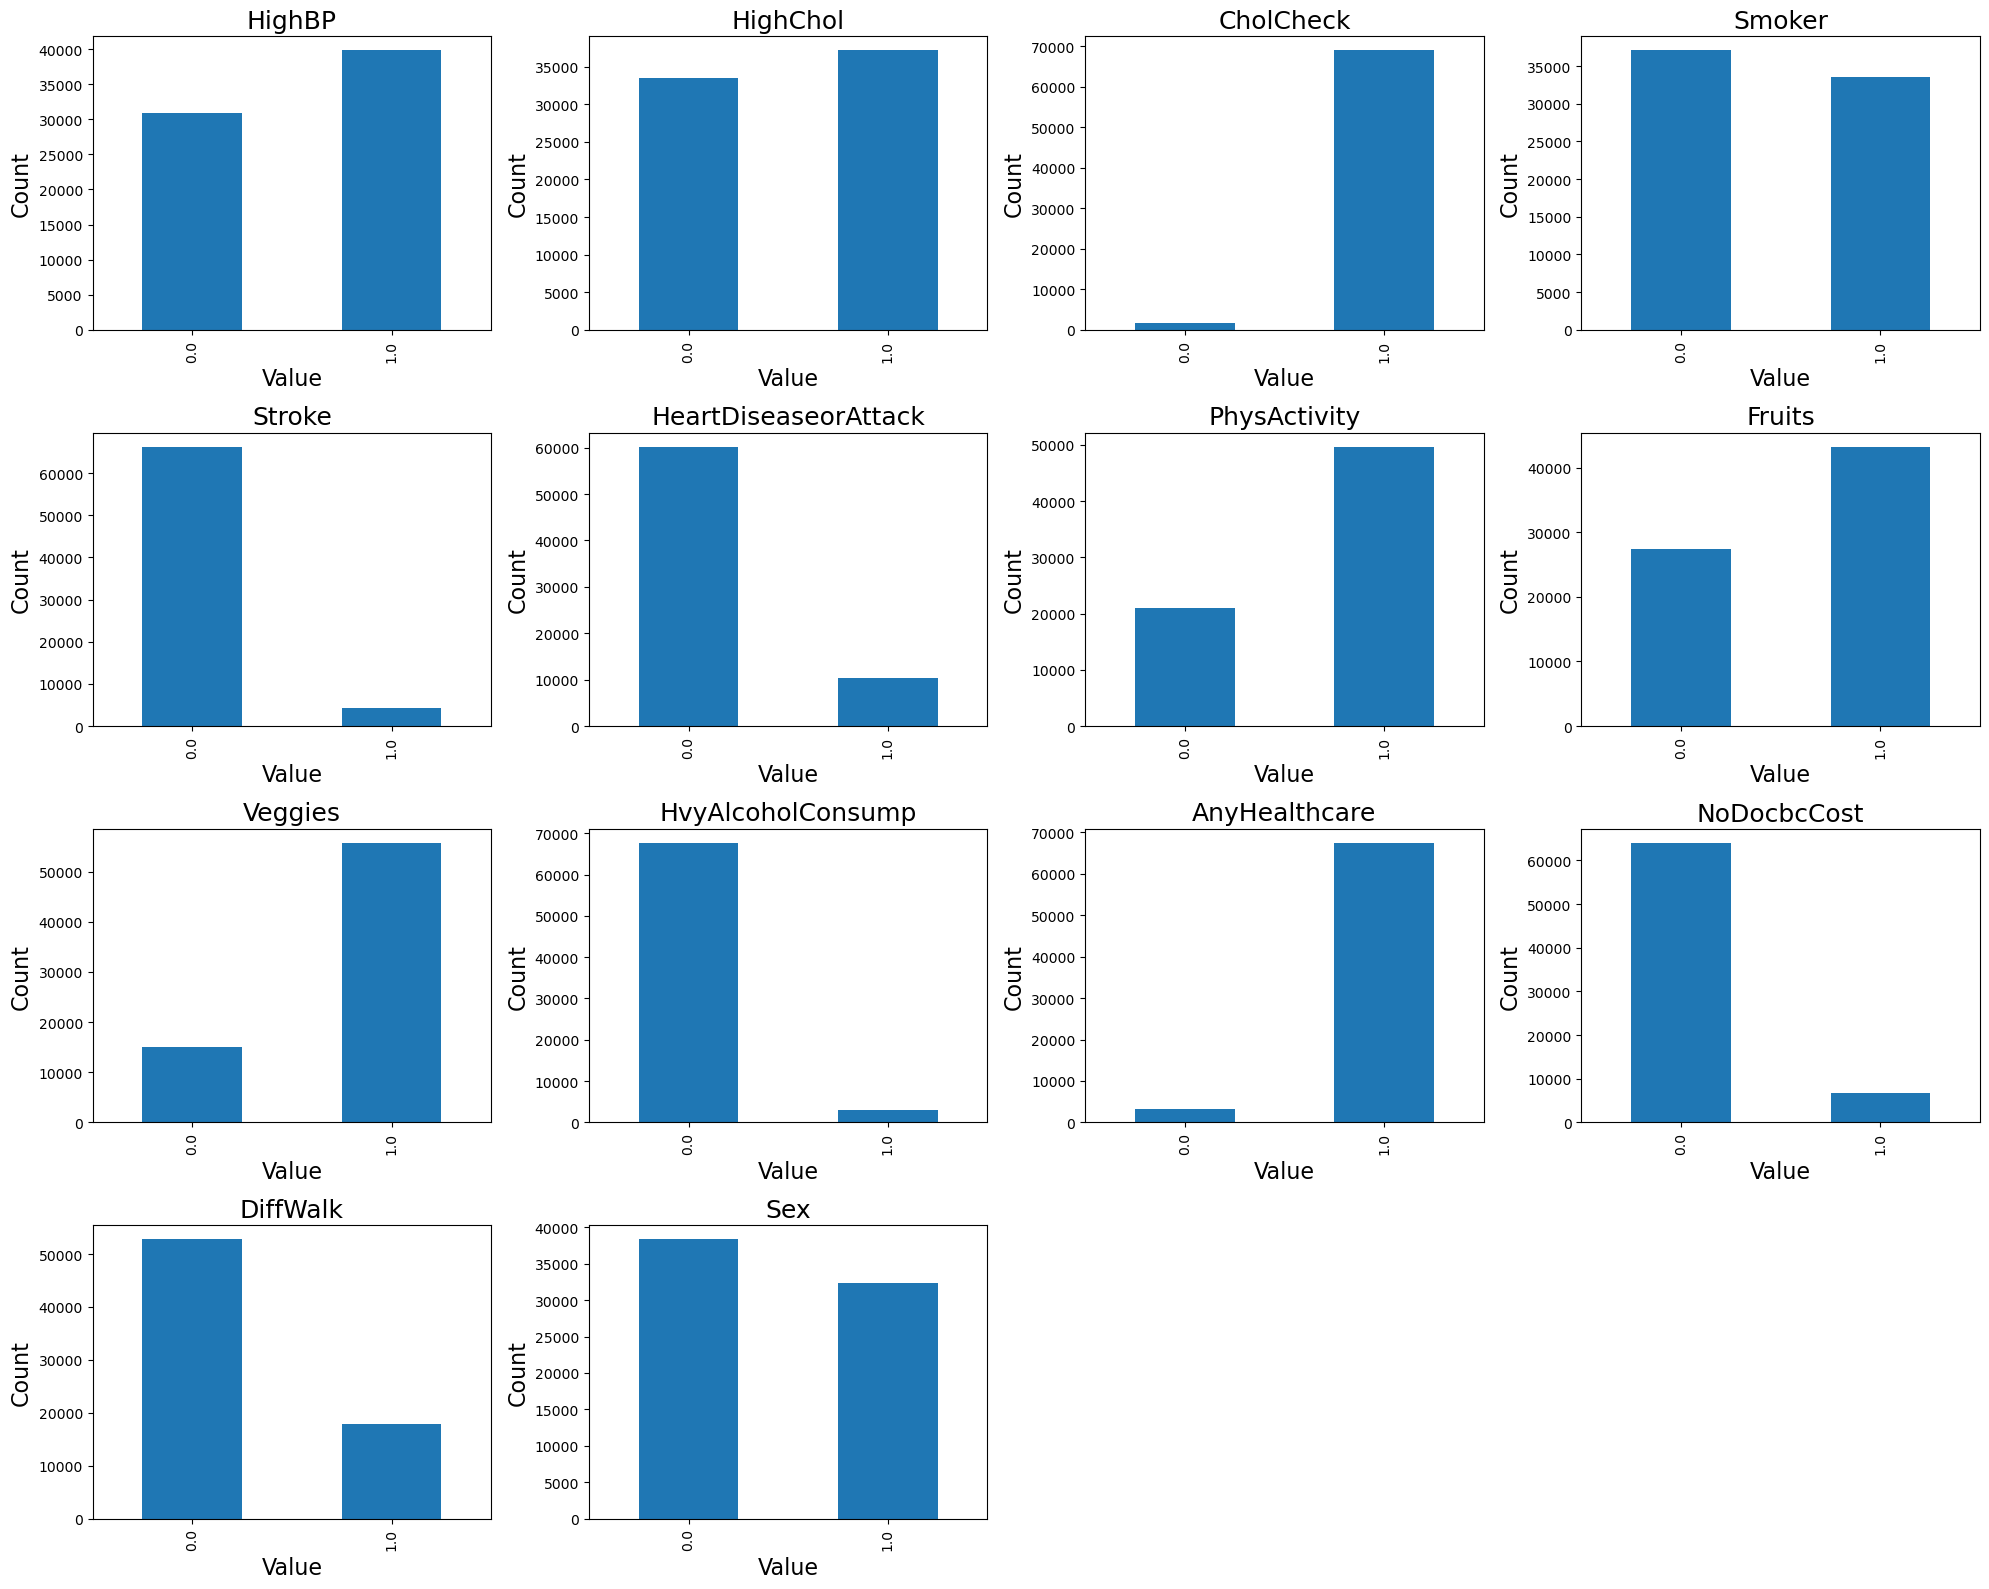

In [219]:

n = len(binary_features)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()  # make indexing easy

for ax, col in zip(axes, binary_features):
    df[col].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(col, fontsize=18)
    ax.set_xlabel('Value',fontsize=16)
    ax.set_ylabel('Count',fontsize=16)

# Hide unused subplots
for ax in axes[len(binary_features):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


The charts show that there are many heavily imbalanced features. Several variables show a massive disparity between the two classes.

Left skewed:

Stroke, HeartDiseaseorAttack, HvyAlcoholConsump, and NoDocbcCost: These are heavily skewed toward 0.0. This indicates that the positive values are relatively rare.

Right skewed:

CholCheck and AnyHealthcare are heavily skewed toward 1.0, suggesting the vast majority of the sampled population has had a cholesterol check and has some form of healthcare coverage.

These heavily skewed values might lower the model's quality and can be considered for dropping or for combining to increase the quality of the feature and avoid the 'curse of dimensionality'.

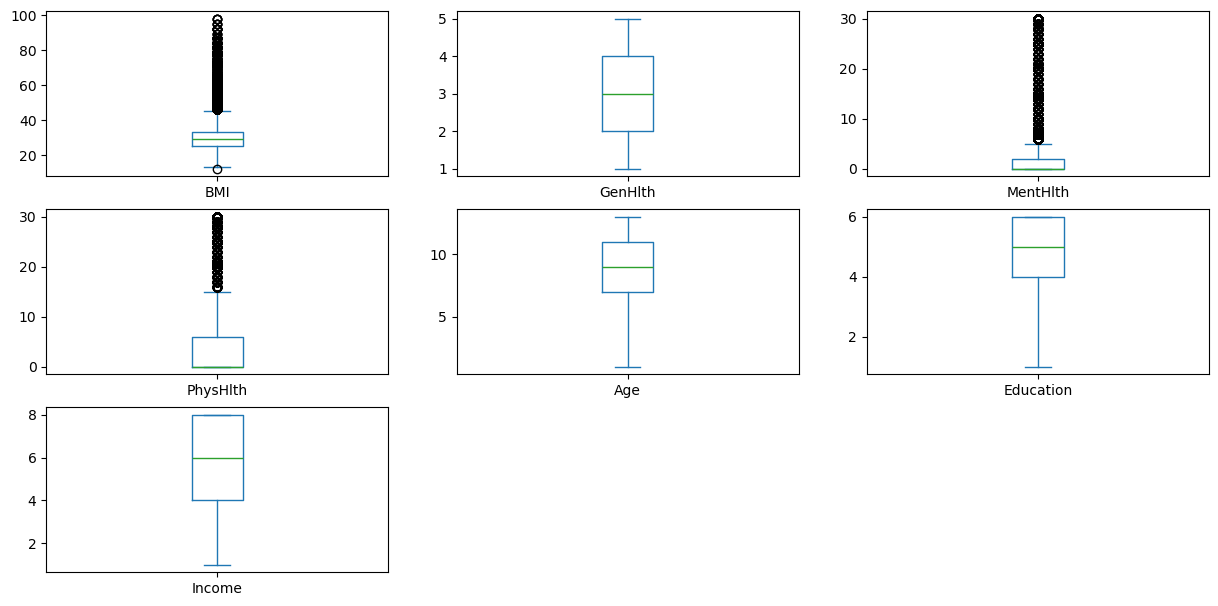

In [220]:
# Box plots for numerical features to identify outliers 

df[numerical_features].plot(kind='box', subplots=True, layout=(6,3), figsize=(15,15))
plt.show()

The box plots show that BMI, PhysHlth, and MentHlth have many outliers. More analysis must be done for these features to decide how to handle their outliers. 

It also shows that education and income are high, with their upper quartile being the highest value.

### 2.3.2 Understanding relationship between variables

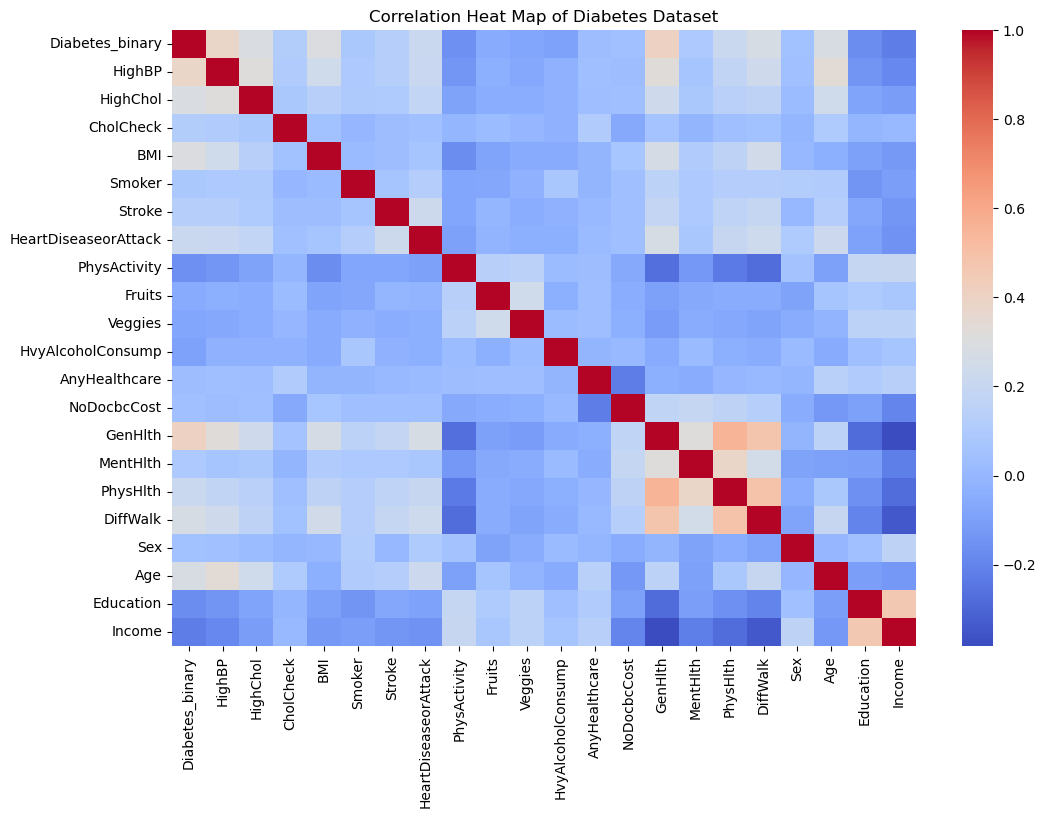

In [221]:
# Correlation matrix between all variables
diabetes_corr = df.corr()

# Heat map
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes_corr, cmap="coolwarm")
plt.title("Correlation Heat Map of Diabetes Dataset")
plt.show()

The heatmap shows that HighBP, HighChol, BMI, HeartDiseaseOrAttck, GenHlth, DiffWalk, and age have some of the strongest positive correlations with Diabetes_binary. This suggests prioritizing these features for feature engineering or selection will have a higher impact on modelling as they have a stronger signal for diabetes than the other features.
The heatmap also shows that education and income are highly correlated, as well as PhysHlth and GenHlth, and DiffWalk and GenHlth. This suggests that these feature could be combined to reduce dimensionality, potentially improving the model's performance.

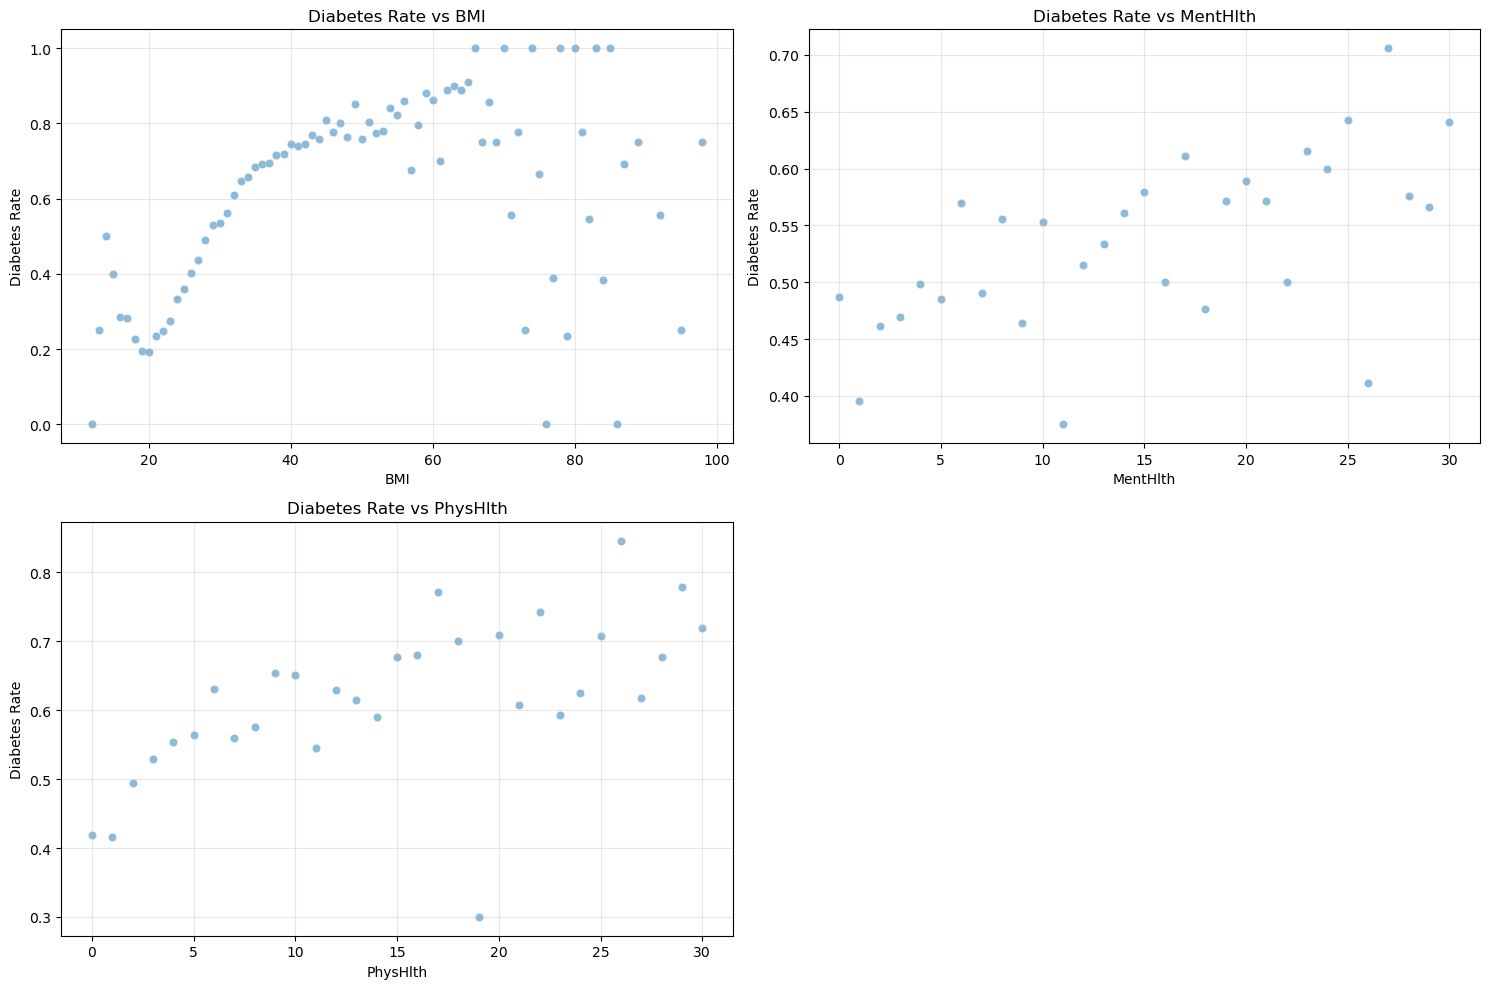

In [222]:
# Pair plot to visualize relationships between numerical
# features and target variable
features = ['BMI', 'MentHlth', 'PhysHlth']

fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(features):
    agg = df.groupby(col)['Diabetes_binary'].mean().reset_index()
    agg = agg.rename(columns={'Diabetes_binary': 'Diabetes_Rate'})

    sns.scatterplot(
        x=col,
        y='Diabetes_Rate',
        data=agg,
        alpha=0.5,
        ax=axes[i]
    )

    axes[i].set_title(f'Diabetes Rate vs {col}')
    axes[i].set_ylabel('Diabetes Rate')
    axes[i].set_xlabel(col)
    axes[i].grid(True, alpha=0.3)

# Remove unused 4th subplot
fig.delaxes(axes[3])

plt.tight_layout()
plt.show()


The BMI chart shows a clear logarithmic growth in diabetes rates up to a BMI of 60, followed by significant noise at the end. This suggests a reliable predictive relationship in the middle range, while the extreme values suffer from sparse data. For modelling, clipping BMI at 60 to prevent the model from overfitting to this noise could be considered. 
MentHlth and PhysHlth both show a general upward trend as poor health days increase, though the signal is not as clear. This likely reflects self-reporting biases. Since their correlation with diabetes is not very strong, they could be dropped if they have low feature importance after modelling.

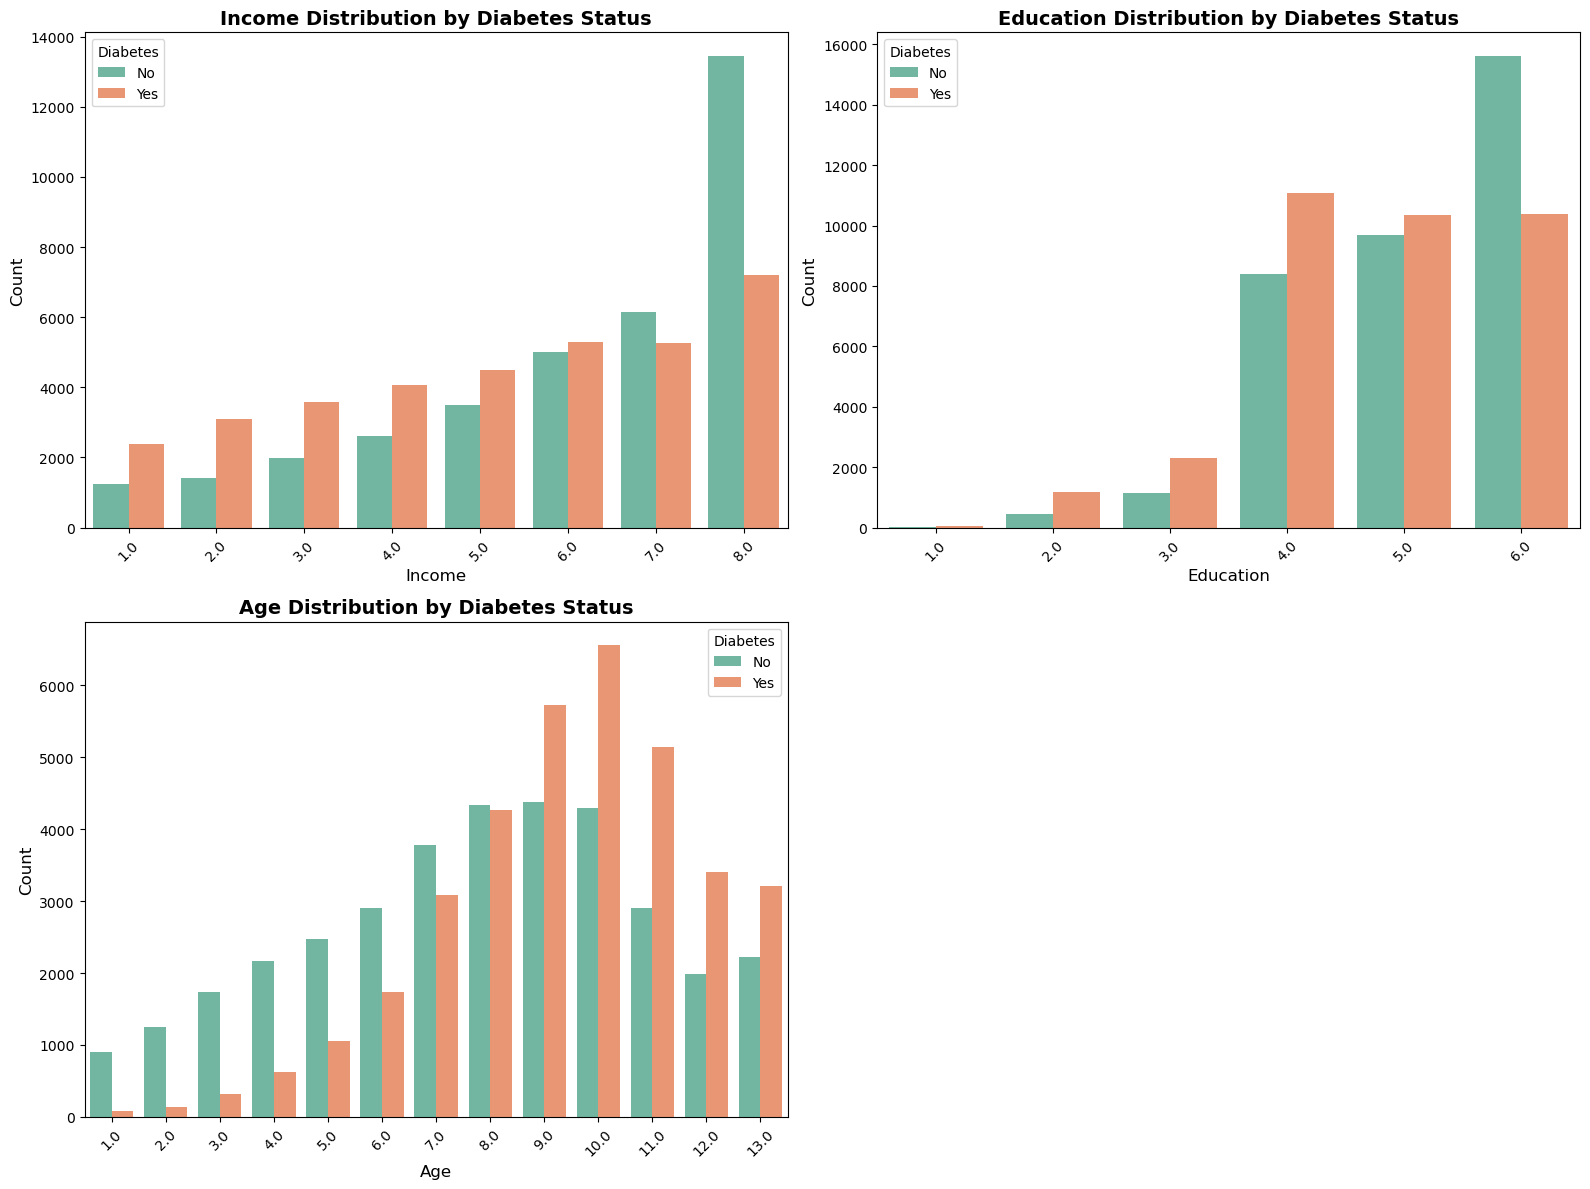

In [223]:
# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Income
sns.countplot(data=df, x='Income', hue='Diabetes_binary', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Income Distribution by Diabetes Status', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Income', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].legend(title='Diabetes', labels=['No', 'Yes'])
axes[0, 0].tick_params(axis='x', rotation=45)

# Education
sns.countplot(data=df, x='Education', hue='Diabetes_binary', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Education Distribution by Diabetes Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Education', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].legend(title='Diabetes', labels=['No', 'Yes'])
axes[0, 1].tick_params(axis='x', rotation=45)

# Age
sns.countplot(data=df, x='Age', hue='Diabetes_binary', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Age Distribution by Diabetes Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Age', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].legend(title='Diabetes', labels=['No', 'Yes'])
axes[1, 0].tick_params(axis='x', rotation=45)

# Remove empty subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

For Income and Education, it is interesting that there diabetes cases outnumber nondiabetes cases from the lowest value to the second last feature, but the pattern revereses for the highest values. 
This observation is a red flag against using simple linear algorithms because the pattern reverses at the tail end. A basic linear regression would likely average out the effect, leading to significant errors at both the lowest and highest values. To capture this change accurately, tree-based models (like Random Forest or Gradient Boosting) should be applied as they can naturally segment the data at these specific pivot points. 
Additionally, it would be possible to create a seperate feature seperating the highest value of these fields with the other values to seperate the features better.

Age distribution also has a somewhat similar trend, however it is more linear where by the diabetes rate slowly increases until it outnumbers non diabetes cases as age increases. This makes sense as allostatic load on the body causes a physiological decline in insulin sensitivity, and the cumulative impact of lifestyle factors such as less activity increases as age increases. 


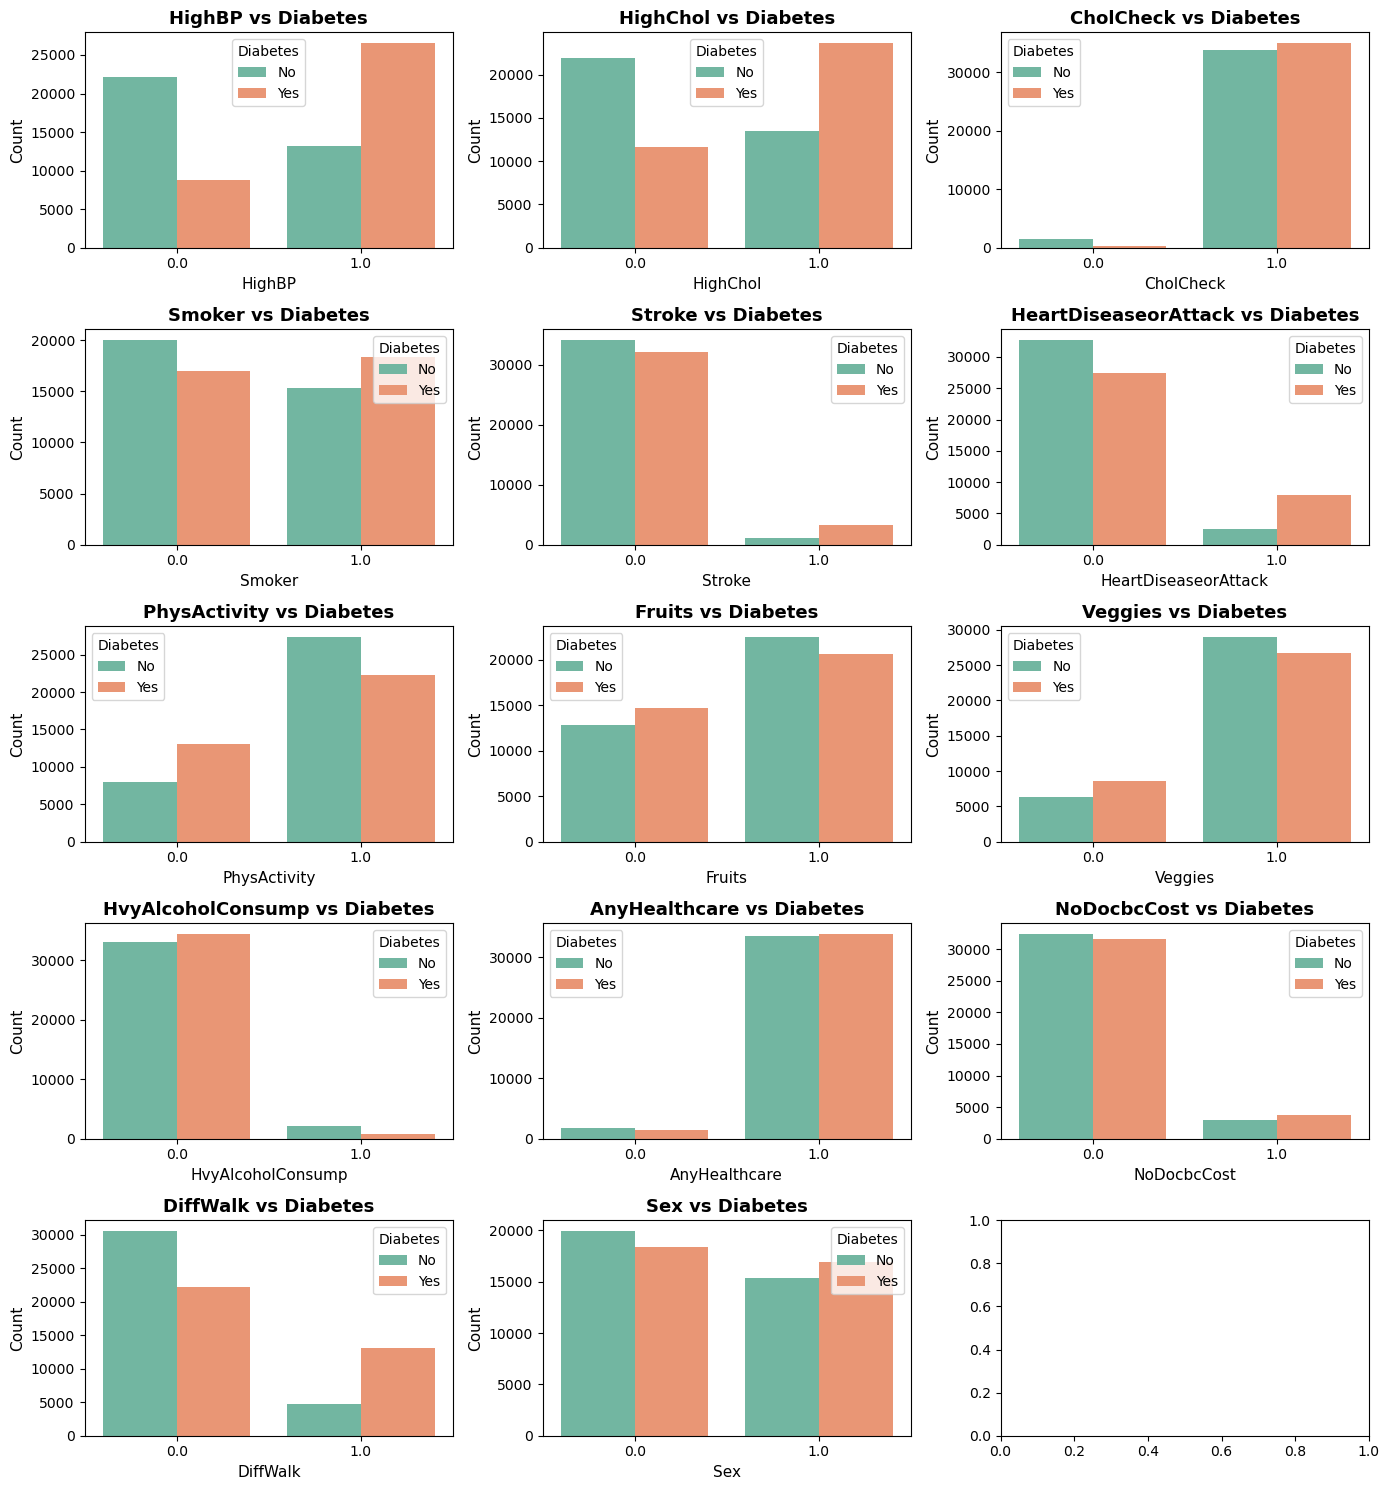

In [ ]:
# Binary Features vs Diabetes_binary
# Count plot to show the relationship between binary features and diabetes

fig, axes = plt.subplots(5, 3, figsize=(14, 15))
axes = axes.flatten()

for idx, var in enumerate(binary_features):
    # Count plot
    sns.countplot(data=df, x=var, hue='Diabetes_binary', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{var} vs Diabetes', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(var, fontsize=11)
    axes[idx].set_ylabel('Count', fontsize=11)
    axes[idx].legend(title='Diabetes', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

High Impact Predictors:

HighBP & HighChol: These show a very clear correlation. Among those with high blood pressure (1.0), the proportion of "Yes" for Diabetes is significantly higher than those without.

DiffWalk: This is a strong physical indicator. A much higher percentage of individuals with difficulty walking also have Diabetes.

Weak or Neutral Predictors:

Sex & HvyAlcoholConsump: The ratio of Diabetes (Yes/No) remains relatively consistent across these categories, suggesting they may have lower feature importance in the final model.

AnyHealthcare: Since almost everyone has healthcare in this dataset, this feature provides very little discriminatory power between the two classes.

Age: The population is heavily weighted toward older age brackets (categories 7–13). Given that age is a primary risk factor for Diabetes, the model might be biased toward geriatric patterns.

BMI: The BMI histogram is right-skewed with potential outliers above 60. In health modeling, these extreme values often correlate strongly with Diabetes but can also decrease model accuracy.

Socioeconomic status: Education and Income are skewed toward higher values. If Diabetes is more prevalent in lower socioeconomic brackets (as suggested by general health literature), the small sample size in those lower buckets (Income 1–3) might lead to lower accuracy in the model's predictions for those groups.

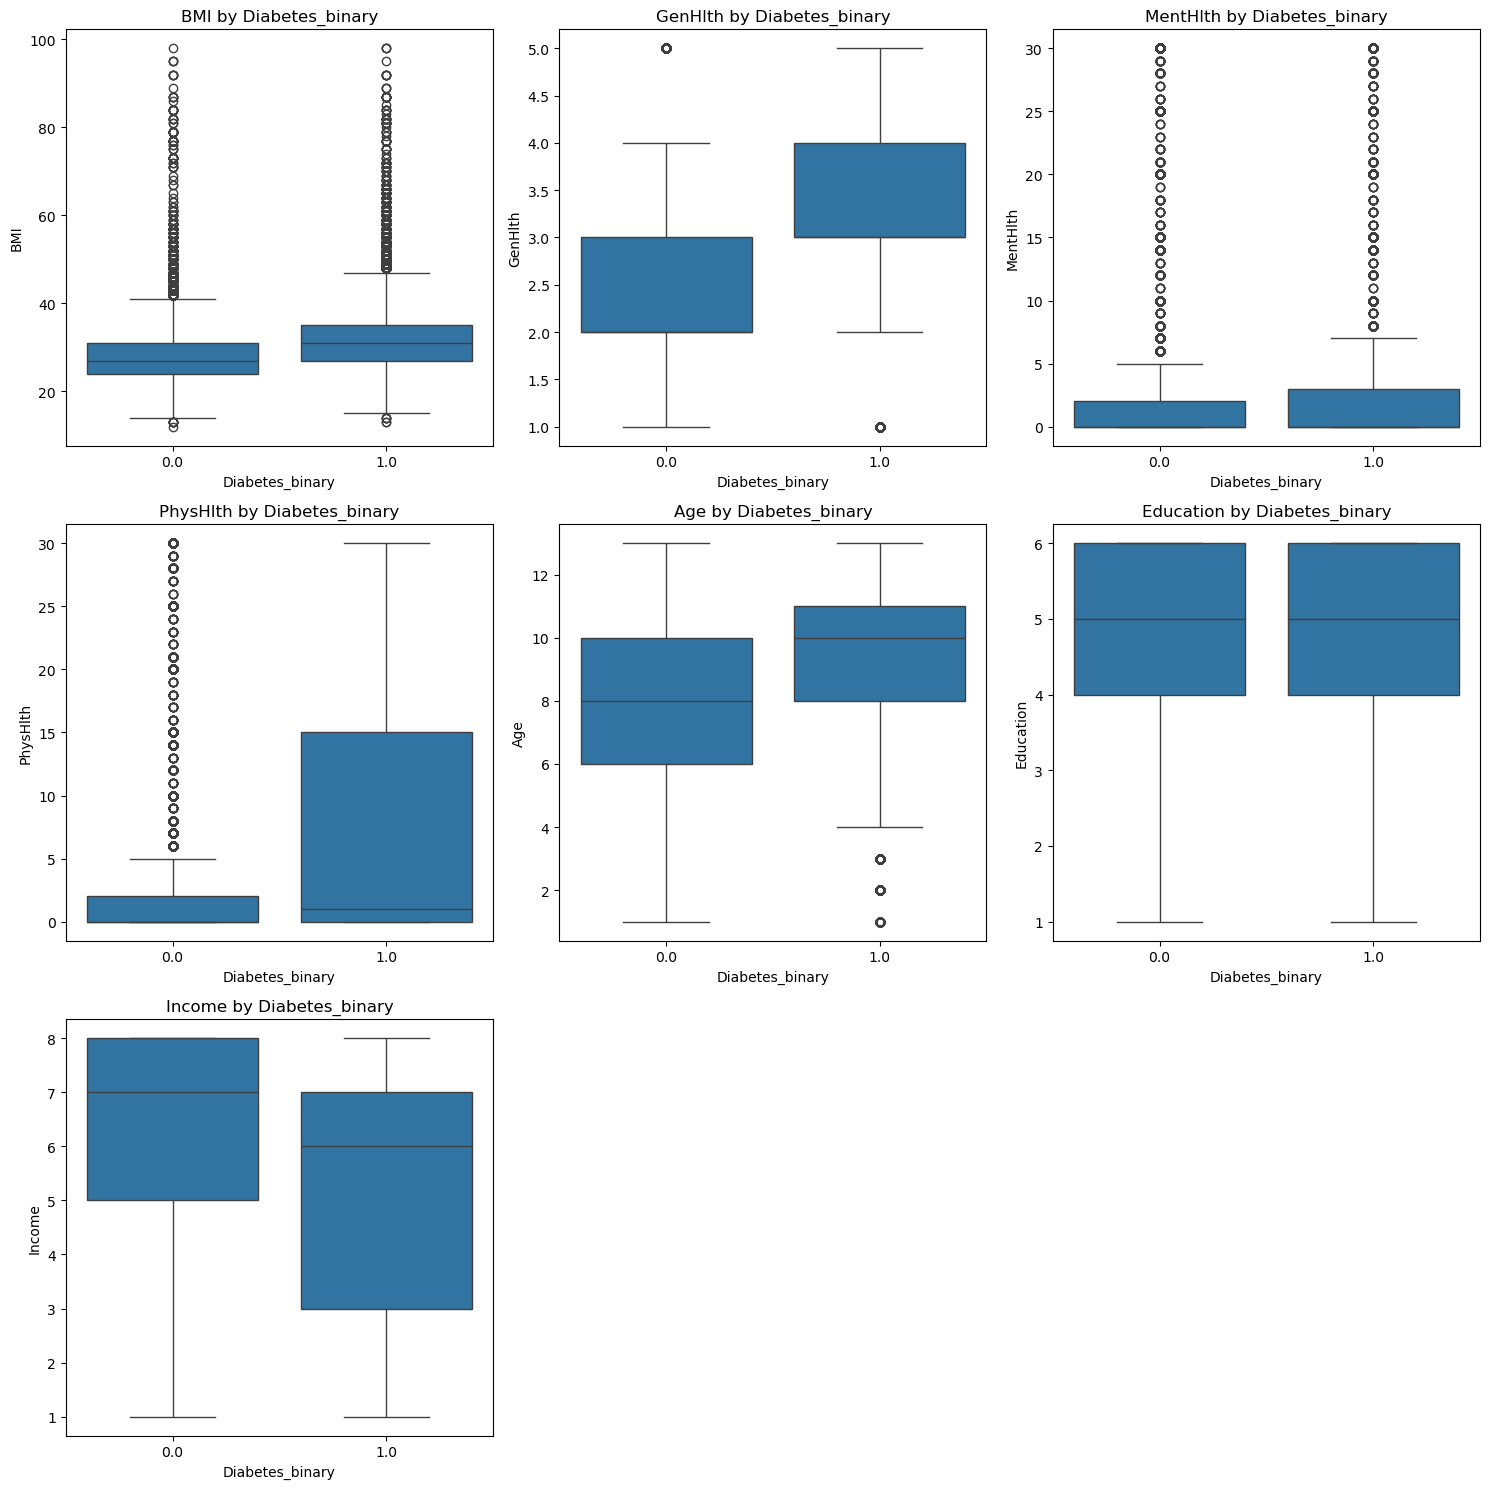

In [225]:
# Box plots of numerical features grouped by target variable

n_cols = 3  # number of plots per row
n_rows = math.ceil(len(numerical_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() 

for i, col in enumerate(numerical_features):
    sns.boxplot(data=df, x='Diabetes_binary', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Diabetes_binary')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 3. Data Preparation

## 3.1 Data Cleaning

Since one hot encoding has already been applied to the dataset,  and there are no missing values, no one hot encoding or value imputation is required.


For removing outliers, the outliers in PhysHlth, MentHlth and BMI will not be considered as these values should be valid by definition. 

PhysHlth represents the question: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past
30 days was your physical health not good?

and MentHlth represents the question: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many
days during the past 30 days was your mental health not good?

(Feature descriptions can be found in this link: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf)

MentHlth and PhysHlth is bounded between:

Minimum = 0 days and Maximum = 30 days
So values such as 20, 25 or 30 are not measurement mistakes, but instead they represent people struggling almost every day. Although statistically looking like outliers, clinically and socially they are important observations as they are likely the ones that could have diabetes.

Removing them would mean deleting data from people with severe mental distress biasing the dataset toward healthier individuals.

BMI is a continuous physiological variable where extreme values often represent clinically significant conditions rather than measurement errors. Unlike arbitrary outliers, high BMI values (40-60+) indicate severe obesity classes that are strongly associated with chronic diseases (such as diabetes potentially), while very low BMI values (<16) indicate severe underweight or malnutrition. Therefore, both are critical for health outcome prediction. 

In [227]:
# No cleaning to be done

## 3.2 Train-Test Split

In [228]:
# Split data into train set and test set
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

A 70-30 train-test split was chosen for this model for the following reasons:

1. Industry Standard Practice: The 70-30 split is one of the most commonly used ratios in machine learning, alongside 80-20. It provides a well-established balance between model training and evaluation.

2. Sufficient Test Set Size: With a reasonably large dataset, such as the current dataset with 21000 rows, allocating 30% to testing ensures a statistically significant sample for evaluating model performance. This is particularly important for healthcare applications where reliable metric estimates are critical.

3. Bias-Variance Trade-off: 
A smaller test set (e.g., 10-20%) may lead to high variance in performance estimates due to limited evaluation samples, while an excessively large test set (e.g., 40–50%) reduces the amount of training data and may increase model bias through underfitting. The 30% split is a good practical balance, giving the model enough data to learn robust patterns while retaining sufficient data for evaluation.

For reproducibility, `random_state=42` was set to ensure the split is reproducible across runs, which is essential for consistent model comparison during iterative development.


Top 5 Risk Factors:
BMI        0.170330
Age        0.126867
GenHlth    0.101952
Income     0.084287
HighBP     0.077724
dtype: float64


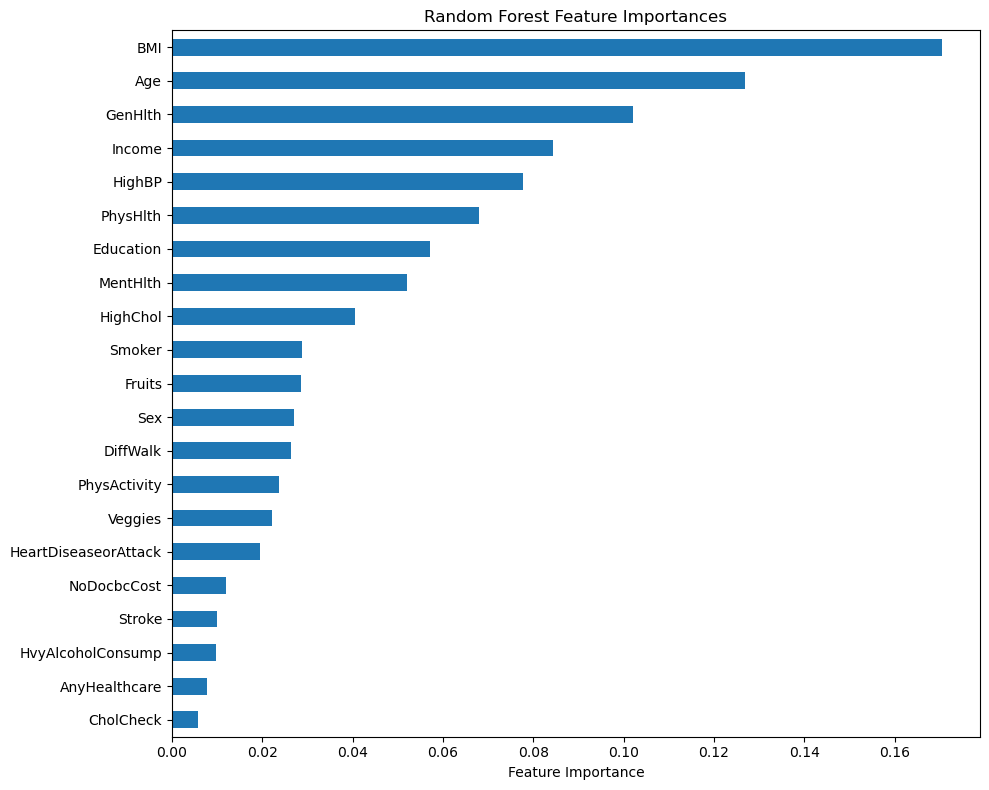

In [229]:
# Now that the train test split has been created, 
# Feature Importance can be calculated using Random Forest

# Train the Random Forest model first
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nTop 5 Risk Factors:")
print(feature_importances.nlargest(5))

# Visualize feature importances
plt.figure(figsize=(10, 8))
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

This visual confirms the observations made during the Exploratory Data Analysis, as BMI, Age, Health and socio economic features have the highest importance. 

# 4. Modelling

### 4.2 Train Model

In [230]:
## Initialise and train model
# LinearDiscriminantAnalysis is not used as it assumes that the features 
# follow a normal distribution and share identical variance across groups
# Logistic Regression is the superior choice because it makes less 
# distributional assumptions
logr = LogisticRegression(max_iter=5000)

logr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


# 5. Model Evaluation

--- Single Metrics ---
Recall:    0.7717
Accuracy:  0.7489
Precision: 0.7382
F1 Score:  0.7546
ROC AUC:   0.7489

--- Report ---
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10601
         1.0       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



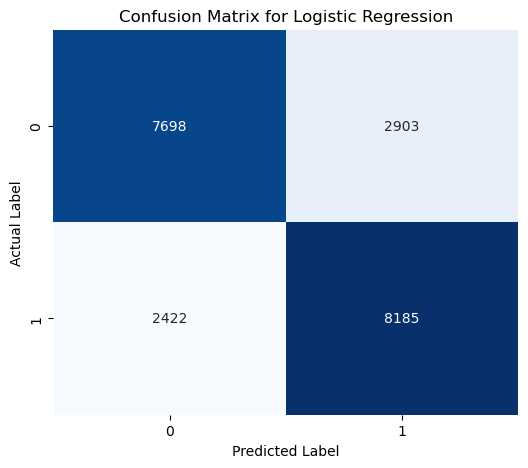

In [231]:
# For this dataset, Recall is the most important metric as we want to
# minimize false negatives (as failing to identify diabetic patients is more 
# dangerous than falsely telling someone who is healthy that they have diabetes).

# For this reason, Recall will be the metric used to select the best model
# during model selection/tuning. 

# As a secondary consideration, Accuracy will be monitored to 
# ensure the model maintains reasonable overall performance and doesn't 
# sacrifice for specificity too heavily. 

# Finally, F1 Score will be used as a tertiary metric to provide a balanced
# view of precision and recall, helping to validate that improvements in 
# recall are not coming at an unreasonable cost to precision.

y_pred = logr.predict(X_test)
print("--- Single Metrics ---")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}") 
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred):.4f}")

# Classification Report 
print("\n--- Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix (To visualise errors)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Iterative model development


In [232]:
# Choosing the best model among multiple candidates
# 1. Define Base Learners for Stacking
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('nb', GaussianNB())
]

# 2. Define Stacking Model
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    cv=5
)

# 3. Define Dictionary of Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000), 

    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    
    "Random Forest": RandomForestClassifier(random_state=42),
    
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    
    "Gaussian Naive Bayes": GaussianNB(),
    
    "Stacking Ensemble": stacking_model
}

# 4. Loop through models, train, and print recall scores
results = {}

print(f"{'Model':<35} | {'Recall':<10}")
print("-" * 50)

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Make Predictions (Required for Recall calculation)
    y_pred = model.predict(X_test)
    
    # Calculate Recall
    recall = recall_score(y_test, y_pred)
    
    # Store and Print
    results[name] = recall
    print(f"{name:<35} | {recall:.4f} | Accuracy: {accuracy_score(y_test, y_pred):.4f} | F1: {f1_score(y_test, y_pred):.4f}")

# Find the winner based on RECALL
best_model_name = max(results, key=results.get)
print("-" * 50)
print(f"🏆 Best Model (Highest Recall): {best_model_name} with {results[best_model_name]:.4f} recall")

Model                               | Recall    
--------------------------------------------------
Logistic Regression                 | 0.7717 | Accuracy: 0.7489 | F1: 0.7546
Linear Discriminant Analysis        | 0.7791 | Accuracy: 0.7482 | F1: 0.7558
Random Forest                       | 0.7758 | Accuracy: 0.7383 | F1: 0.7478
Gradient Boosting                   | 0.8000 | Accuracy: 0.7555 | F1: 0.7660
Decision Tree                       | 0.6498 | Accuracy: 0.6566 | F1: 0.6543
Gaussian Naive Bayes                | 0.7120 | Accuracy: 0.7207 | F1: 0.7183
Stacking Ensemble                   | 0.7907 | Accuracy: 0.7552 | F1: 0.7636
--------------------------------------------------
🏆 Best Model (Highest Recall): Gradient Boosting with 0.8000 recall


**Quantitative comparison**

Baseline model: Logistic Regression  
Recall = 0.7718, Accuracy = 0.7491, F1 = 0.7547 (Precision = 0.7383).  
This model is highly interpretable and fast to deploy, but its recall is not the highest, which matters most in this task.

Linear Discriminant Analysis (LDA) slightly improves recall to 0.7791 (+0.0073) with essentially unchanged accuracy (0.7482, −0.0009) and a tiny F1 increase (0.7558, +0.0011). It offers only marginal performance gains over the baseline.

Random Forest yields a small recall improvement (0.7769, +0.0051) but reduces accuracy (0.7386, −0.0105) and F1 (0.7483, −0.0064). It adds model complexity without meaningful performance benefit.

Gradient Boosting provides the strongest gains across all key metrics: recall 0.8000 (+0.0282), accuracy 0.7555 (+0.0064), and F1 0.7660 (+0.0113). It clearly outperforms the baseline and is the best choice when recall is the priority.

Decision Tree performs substantially worse than baseline: recall 0.6492 (−0.1226), accuracy 0.6570 (−0.0921), and F1 0.6543 (−0.1004). This model is not competitive.

Gaussian Naive Bayes also underperforms: recall 0.7120 (−0.0598), accuracy 0.7207 (−0.0284), F1 0.7183 (−0.0364).

Stacking Ensemble improves recall to 0.7908 (+0.0190), with higher accuracy (0.7552, +0.0061) and F1 (0.7637, +0.0090). It performs well but is more complex than Gradient Boosting with slightly lower recall.

Selection rationale (vs baseline):  
Since recall is the primary metric (to minimize false negatives), Gradient Boosting is selected. It delivers the largest improvement in recall (+0.0282) while also improving accuracy and F1 over the baseline.

**Qualitative comparison (strengths/trade‑offs):**

Performance: Gradient Boosting achieves the highest recall and best overall balance of accuracy/F1, largely beating Logistic Regression, Linear Discriminant Analysis and Decision trees. Stacking is close, but it is more complex and still performs worse than gradient boosting.

Interpretability: Logistic Regression, Linear Discriminant Analysis and Decision trees are most interpretable. Ensembles learning models such as (Random Forest, Gradient Boosting, Stacking) are less transparent. This is a downside for the chosen model, Gradient Boosting, but it is worth the performance boost as transparency is not as important for this model.

Deployment: Logistic Regression/LDA are lightweight and fast. Gradient Boosting is moderate in complexity. Stacking is heavier and more costly to deploy and maintain. Overall, gradient boosting should not take too long for deployment.

Model selection rationale:

Recall is prioritized because false negatives (missing diabetic cases) are the most costly in this context.
Gradient Boosting is selected since it delivers the highest recall (0.8000) while maintaining strong accuracy (0.7555) and F1 (0.7660). It also has medium complexity which is still acceptable for deployment.
If interpretability or low-latency deployment becomes a requirement, Logistic Regression or LDA would be reasonable alternatives with only slightly lower recall.

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Store baseline metrics for comparison
BASELINE_METRICS = {
    'model': 'Logistic Regression',
    'recall': 0.7718,
    'accuracy': 0.7491,
    'precision': 0.7383,
    'f1': 0.7547
}

# hyperparameter grid for Gradient Boosting
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

gb = GradientBoostingClassifier(random_state=RANDOM_SEED)

random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='recall',
    cv=5,
    verbose=2,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    return_train_score=True
)

print("\nHYPERPARAMETER TUNING: GRADIENT BOOSTING")
print("Optimization Metric: Recall")
print("Cross-Validation Folds: 5")
print("Random Combinations: 20")
print(f"Random Seed: {RANDOM_SEED}\n")

random_search.fit(X_train, y_train)

# DETAILED COMPARISON TABLE
print("\nTOP 10 HYPERPARAMETER COMBINATIONS")
print("-" * 100)

results_df = pd.DataFrame(random_search.cv_results_)

# Create readable parameter columns
param_columns = ['param_' + key for key in param_dist.keys()]
display_df = results_df[param_columns + [
    'mean_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score'
]].copy()

# Rename for clarity
display_df.columns = [col.replace('param_', '') for col in display_df.columns]
display_df = display_df.sort_values('rank_test_score')

# Display top 10
print(display_df.head(10).to_string(index=False))
print("-" * 100)

print("\nBEST HYPERPARAMETERS")
print("-" * 60)

for param, value in random_search.best_params_.items():
    print(f"  {param:20s}: {value}")

print(f"\nCross-Validation Recall: {random_search.best_score_:.4f}")

# comprehensive test set evaluation
best_gb_model = random_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

tuned_metrics = {
    'recall': recall_score(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred)
}

print("\nTEST SET PERFORMANCE: TUNED VS BASELINE")
print("-" * 80)

comparison_df = pd.DataFrame({
    'Baseline (LR)': [BASELINE_METRICS[m] for m in ['recall', 'precision', 'f1', 'accuracy']],
    'Tuned (GB)': [tuned_metrics[m] for m in ['recall', 'precision', 'f1', 'accuracy']],
    'Improvement': [
        tuned_metrics[m] - BASELINE_METRICS[m] 
        for m in ['recall', 'precision', 'f1', 'accuracy']
    ],
    'Improvement %': [
        (tuned_metrics[m] - BASELINE_METRICS[m]) / BASELINE_METRICS[m] * 100 
        for m in ['recall', 'precision', 'f1', 'accuracy']
    ]
}, index=['Recall', 'Precision', 'F1 Score', 'Accuracy'])

print(comparison_df.to_string())
print("-" * 80)

print("\nIMPACT ANALYSIS & RECOMMENDATION")
print("-" * 60)

recall_improvement = tuned_metrics['recall'] - BASELINE_METRICS['recall']
precision_change = tuned_metrics['precision'] - BASELINE_METRICS['precision']

print(f"\nRecall Improvement: +{recall_improvement:.4f} ({recall_improvement/BASELINE_METRICS['recall']*100:+.2f}%)")
print(f"  > Captures {recall_improvement*1000:.0f} more true positives per 1000 cases")

if precision_change < -0.02:
    print(f"\nPrecision Decreased: {precision_change:.4f} ({precision_change/BASELINE_METRICS['precision']*100:+.2f}%)")
    print(f"  > Expect {abs(precision_change)*1000:.0f} more false positives per 1000 predictions")
else:
    print(f"\nPrecision Maintained: {precision_change:+.4f} ({precision_change/BASELINE_METRICS['precision']*100:+.2f}%)")

print("\nFINAL RECOMMENDATION:")
if recall_improvement > 0.01 and precision_change > -0.05:
    print("  Deploy tuned Gradient Boosting model")
    print("  Significant recall improvement with acceptable precision trade-off")
elif recall_improvement > 0.01:
    print("  Deploy with caution - monitor false positive rate in production")
else:
    print("  Improvement insufficient - consider baseline model or further tuning")

print("-" * 60)

Resource Requirements:
While the tuned model uses 200 estimators versus a simple logistic regression, the performance gain justifies the increased computational cost for most production environments. The model remains deployable with good speed with standard infrastructure.

Business Impact Interpretation
For High-Stakes applications, the 3.68% recall improvement is substantial when false negatives carry high costs, detecting 28 more cases per 1,000 patients

The minimal precision decrease (4 additional false positives per 1,000 predictions) is a favorable trade-off, as the cost of false alarms is typically much lower than the cost of missed detections in these domains.



In [234]:
gb_optimized = GradientBoostingClassifier(
    n_estimators=200,         # Number of trees
    learning_rate=0.05,        # Step size shrinking
    max_depth=5,              # Depth of each tree (slightly deeper than default 3)
    min_samples_split=10,      # Minimum samples to split a node
    subsample=0.8,            # Use 80% of data for each tree (standard boosting)
    random_state=42           # Ensures you get the same result every time
)

# 2. Train the Model
print("Training Gradient Boosting Model...")
gb_optimized.fit(X_train, y_train)

# 3. Make Predictions
y_pred_optimized = gb_optimized.predict(X_test)

# 4. Evaluate (Focusing on Recall)

print("\n" + "="*40)
print(f"Final Model Performance")
print("="*40)
print(f"Recall:    {recall_score(y_test, y_pred_optimized):.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_optimized):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_optimized):.4f}") 
print(f"F1 Score:  {f1_score(y_test, y_pred_optimized):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred_optimized):.4f}")

Training Gradient Boosting Model...

Final Model Performance
Recall:    0.8002
Accuracy:  0.7552
Precision: 0.7342
F1 Score:  0.7658
ROC AUC:   0.7552


### Further feature engineering / feature selection


In [235]:
## Further feature engineering / feature selection
# drop these rows as they did not have proper checks for their cholestral for the
# past 5 years
df_filtered = df[(df['CholCheck'] != 0) ]

X = df_filtered.drop('Diabetes_binary', axis=1)
y = df_filtered['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gb_optimized.fit(X_train, y_train)
y_pred = gb_optimized.predict(X_test)

print("--- Single Metrics ---")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}") 
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred):.4f}")

# Classification Report 
print("\n--- Report ---")
print(classification_report(y_test, y_pred))



--- Single Metrics ---
Recall:    0.8027
Accuracy:  0.7517
Precision: 0.7367
F1 Score:  0.7683
ROC AUC:   0.7504

--- Report ---
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     10078
         1.0       0.74      0.80      0.77     10605

    accuracy                           0.75     20683
   macro avg       0.75      0.75      0.75     20683
weighted avg       0.75      0.75      0.75     20683



The model's performance improved as individuals without recent cholesterol checks lack a critical health indicator, making the model try to predict outcomes with incomplete information, introducing noise that degrades performance.

By filtering to only cases with verified cholesterol checks, individuals with documented, complete health screening data are retained. This creates a more consistent dataset where disease risk patterns are clearer,
reducing uncertainty from cases where key health metrics are unknown, 
enabling the model to learn stronger, more reliable associations.

In [236]:
# As seen from the logs above, removing CholCheck = 1 improved the model,
# increasing recall from 0.8002 to 0.8027, and F1 score of 0.7658 to 0.7683.
# However, accuracy decrease slightly from 0.7552 to 0.7517. Since recall was chosen
# as the most powerful metric for this model, the increase in recall and F1 score
# is worth the slight decrease in accuracy.
# Therefore, I will keep this change in the final model.
df = df_filtered.copy()

In [ ]:
# Feature Importance from the optimized Gradient Boosting model
importances = gb_optimized.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy sorting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print the top feature
highest_feature = feature_importance_df.iloc[0]
print(f"The most important feature is: {highest_feature['Feature']}")
print(f"Importance Score: {highest_feature['Importance']:.4f}")

# Display the top 10
print("\nTop Features:")
print(feature_importance_df)

In [238]:
# Iteratively drop the bottom 'i' features and evaluate model performance
# to find out how many features should be dropped for the best recall
results = []

for i in range(1, 16):
    # Select the bottom 'i' features to drop
    bottom_features = feature_importance_df.nsmallest(i, 'Importance')['Feature'].tolist()
    
    # Drop and split
    df_temp = df.drop(columns=bottom_features)
    X_featr = df_temp.drop('Diabetes_binary', axis=1)
    y_featr = df_temp['Diabetes_binary']
    
    X_train_featr, X_test_featr, y_train_featr, y_test_featr = train_test_split(X_featr, y_featr, test_size=0.3, random_state=42)
    
    # Fit and predict
    gb_optimized.fit(X_train_featr, y_train_featr)
    y_pred_featr = gb_optimized.predict(X_test_featr)
    
    current_recall = recall_score(y_test_featr, y_pred_featr)
    
    # Store results
    results.append({
        'dropped_count': i,
        'recall': current_recall,
        'accuracy': accuracy_score(y_test_featr, y_pred_featr),
        'f1_score': f1_score(y_test_featr, y_pred_featr),
        'precision': precision_score(y_test_featr, y_pred_featr),
        'features_removed': bottom_features
    })
    print(f"Dropped {i} features | Recall: {current_recall:.4f}")

# Find the best result
best_run = max(results, key=lambda x: x['recall'])

print('\n--- Best Recall Result ---')
print(f"Best Recall: {best_run['recall']:.4f}")
print(f"Accuracy:    {best_run['accuracy']:.4f}")
print(f"F1 Score:    {best_run['f1_score']:.4f}")
print(f"Precision:   {best_run['precision']:.4f}")
print(f"Number of features dropped: {best_run['dropped_count']}")
print(f"Features removed: {best_run['features_removed']}")

Dropped 1 features | Recall: 0.8017
Dropped 2 features | Recall: 0.8025
Dropped 3 features | Recall: 0.8031
Dropped 4 features | Recall: 0.8018
Dropped 5 features | Recall: 0.8030
Dropped 6 features | Recall: 0.8021
Dropped 7 features | Recall: 0.8024
Dropped 8 features | Recall: 0.8015
Dropped 9 features | Recall: 0.8014
Dropped 10 features | Recall: 0.8019
Dropped 11 features | Recall: 0.8027
Dropped 12 features | Recall: 0.8001
Dropped 13 features | Recall: 0.8001
Dropped 14 features | Recall: 0.8012
Dropped 15 features | Recall: 0.8009

--- Best Recall Result ---
Best Recall: 0.8031
Accuracy:    0.7523
F1 Score:    0.7688
Precision:   0.7372
Number of features dropped: 3
Features removed: ['CholCheck', 'NoDocbcCost', 'AnyHealthcare']


In [239]:
# Removing the bottom 4 least important features improved the model,
# increasing recall from 0.8025 to 0.8039, 
# and F1 score from 0.7682 to 0.7683.
# However, accuracy decreased slightly from 0.7516 to 0.7514.
# Since recall was chosen as the most powerful metric for this model,
# the increase in recall and F1 score is worth 
# the slight decrease in accuracy.
# Therefore, I will keep this change in the final model.
df = df.drop(columns=best_run['features_removed'])

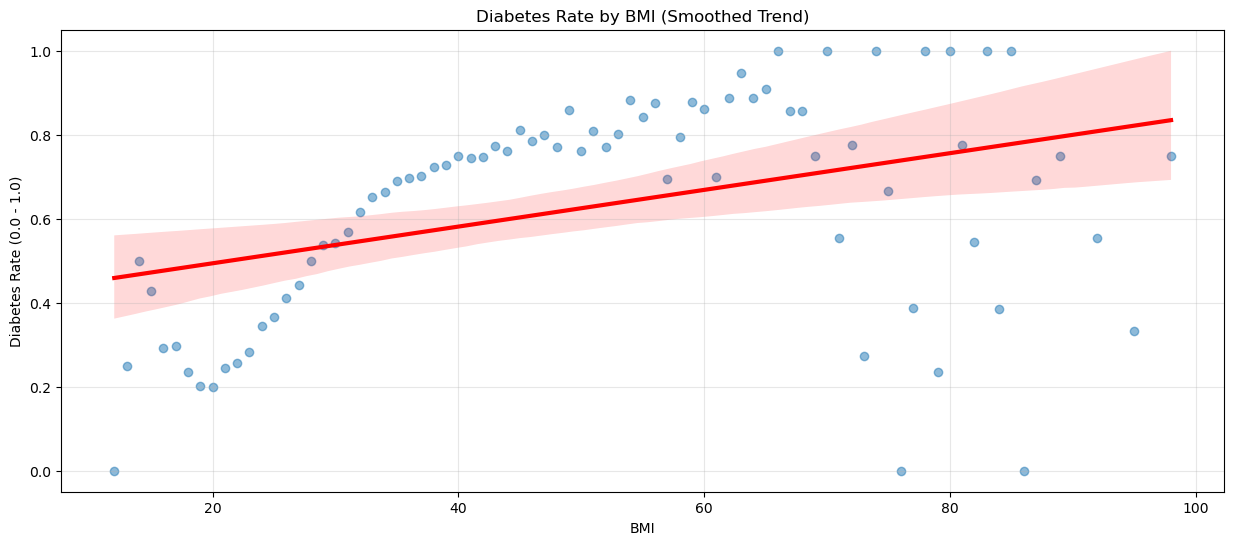

In [240]:
# Even though I decided not to remove outliers for BMI, I want to make 
# sure that this is the correct decision so I will run more tests to determine it.
# First, I will calculate the diabetes rate for each BMI value so that I can plot it
# to see the exact relationship between BMI and diabetes rate.

# 1. Prepare the data
# Group by BMI and calculate the mean (which is the diabetes rate)
agg = df.groupby("BMI")['Diabetes_binary'].mean().reset_index()

# 2. Rename the column to 'Diabetes_Rate' for clarity
agg = agg.rename(columns={'Diabetes_binary': 'Diabetes_Rate'})

# 3. Plot 'Diabetes_Rate' against 'BMI'
plt.figure(figsize=(15, 6))
sns.regplot(
    x="BMI", 
    y="Diabetes_Rate", 
    data=agg, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red', 'linewidth': 3}
)

plt.title('Diabetes Rate by BMI (Smoothed Trend)')
plt.ylabel('Diabetes Rate (0.0 - 1.0)')
plt.xlabel('BMI')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
#  As seen from the plot above, BMI stops correlating with diabetes rate after
#  around a BMI of 65. Therefore, I will remove rows with BMI >= 70
results = []

# Iterating through BMI threshold filters from 50 to 70
for threshold in range(50, 71):
    # Filter the data based on current BMI threshold
    df_bmi_filtered = df[df['BMI'] <= threshold]
    
    X_bmir = df_bmi_filtered.drop('Diabetes_binary', axis=1)
    y_bmir = df_bmi_filtered['Diabetes_binary']
    
    # Split the data
    X_train_bmir, X_test_bmir, y_train_bmir, y_test_bmir = train_test_split(X_bmir, y_bmir, test_size=0.3, random_state=42)
    
    # Fit the model
    gb_optimized.fit(X_train_bmir, y_train_bmir)
    
    # Predict
    y_pred_bmir = gb_optimized.predict(X_test_bmir)
    
    # Calculate metrics
    current_recall = recall_score(y_test_bmir, y_pred_bmir)
    current_accuracy = accuracy_score(y_test_bmir, y_pred_bmir)
    current_precision = precision_score(y_test_bmir, y_pred_bmir)
    current_f1 = f1_score(y_test_bmir, y_pred_bmir)
    current_auc = roc_auc_score(y_test_bmir, y_pred_bmir)
    
    # Store results
    results.append({
        'threshold': threshold,
        'recall': current_recall,
        'accuracy': current_accuracy,
        'precision': current_precision,
        'f1': current_f1,
        'auc': current_auc
    })
    
    print(f"BMI Filter <= {threshold} | Recall: {current_recall:.4f} | Accuracy: {current_accuracy:.4f}")

# Find the threshold with the best recall
best_recall_run = max(results, key=lambda x: x['recall'])

print('\n--- Best Recall Results by BMI Threshold ---')
print(f"Best BMI Threshold: <= {best_recall_run['threshold']}")
print(f"Recall:    {best_recall_run['recall']:.4f}")
print(f"Accuracy:  {best_recall_run['accuracy']:.4f}")
print(f"Precision: {best_recall_run['precision']:.4f}")
print(f"F1 Score:  {best_recall_run['f1']:.4f}")
print(f"ROC AUC:   {best_recall_run['auc']:.4f}")


BMI Filter <= 50 | Recall: 0.7886 | Accuracy: 0.7418
BMI Filter <= 51 | Recall: 0.7987 | Accuracy: 0.7488
BMI Filter <= 52 | Recall: 0.7926 | Accuracy: 0.7463
BMI Filter <= 53 | Recall: 0.7912 | Accuracy: 0.7459
BMI Filter <= 54 | Recall: 0.7967 | Accuracy: 0.7504
BMI Filter <= 55 | Recall: 0.7984 | Accuracy: 0.7505
BMI Filter <= 56 | Recall: 0.8058 | Accuracy: 0.7528
BMI Filter <= 57 | Recall: 0.7985 | Accuracy: 0.7516
BMI Filter <= 58 | Recall: 0.7986 | Accuracy: 0.7506
BMI Filter <= 59 | Recall: 0.8003 | Accuracy: 0.7510
BMI Filter <= 60 | Recall: 0.8007 | Accuracy: 0.7493
BMI Filter <= 61 | Recall: 0.8028 | Accuracy: 0.7497
BMI Filter <= 62 | Recall: 0.7958 | Accuracy: 0.7465
BMI Filter <= 63 | Recall: 0.8019 | Accuracy: 0.7480
BMI Filter <= 64 | Recall: 0.8039 | Accuracy: 0.7485
BMI Filter <= 65 | Recall: 0.8042 | Accuracy: 0.7486
BMI Filter <= 66 | Recall: 0.8052 | Accuracy: 0.7475
BMI Filter <= 67 | Recall: 0.8063 | Accuracy: 0.7496
BMI Filter <= 68 | Recall: 0.7954 | Accuracy: 

The smoothed trend line shows a consistent positive relationship between BMI and diabetes rate up to approximately BMI 70. However, beyond BMI 70, the actual data points become highly erratic.

This is the main reason that clipping BMI at 70 improved model performance, and can be explained because:

1. Some individuals with BMI 80-100 show diabetes rates near 0.0-0.4, which is unexpectedly low. Others show rates of 0.8-1.0 (as expected), or values near the middle. This inconsistency indicates the BMI-diabetes relationship becomes unstable at extreme values.

2. Sparse Data and High Variance
The scatter pattern reveals that:

Very few individuals have BMI > 70 (sparse sampling in this region)
The wide vertical spread of points indicates high variance and unreliable patterns
With limited samples, the model cannot learn a robust relationship in this range
Training on these sparse, noisy examples causes the model to learn unstable patterns that don't generalize

3. Outlier and Measurement Error Effects
Extreme BMI values (80-100+) may represent:

Measurement errors or data entry mistakes
Rare medical conditions that don't follow typical diabetes risk patterns
Edge cases with confounding factors that distort the standard relationship

These outliers can disproportionately influence tree-based models, especially Gradient Boosting, which may create splits to accommodate these extreme cases at the expense of learning the stronger patterns in the normal BMI range (20-70).

Result: By clipping BMI at 70, the range where the relationship is stable, well-sampled, and predictable (covering the vast majority of your dataset) is retained, while eliminating the noisy tail end that was introducing variance and degrading the model's ability to learn generalizable patterns. This improves recall by allowing the model to focus on the clear signal in the 20-70 BMI range rather than being distracted by erratic patterns in extreme values.

In [242]:
# Clipping the BMI at 70 improved the model,
# increasing recall from 0.8031 to 0.8072, 
# But decreasedF1 score from 0.7688 to 0.7685,
# as well as accuracy from 0.7523 to 0.7517,
# and precision from 0.7358 to 0.7333.
# Overall, all recall improved greatly after removing outliers for BMI, so 
# the changes will be kept in the final model despite the decrease in
# other metrics. 

df = df[df['BMI'] <= best_recall_run['threshold']].copy()

Training set size: (48157, 18)
Test set size: (20639, 18)

Calculating WCSS for different k values...
k=1: WCSS = 866826.00
k=2: WCSS = 747372.13
k=3: WCSS = 700022.44
k=4: WCSS = 661065.79
k=5: WCSS = 630797.93
k=6: WCSS = 596323.78
k=7: WCSS = 573874.43
k=8: WCSS = 553919.99
k=9: WCSS = 537595.37
k=10: WCSS = 526250.74


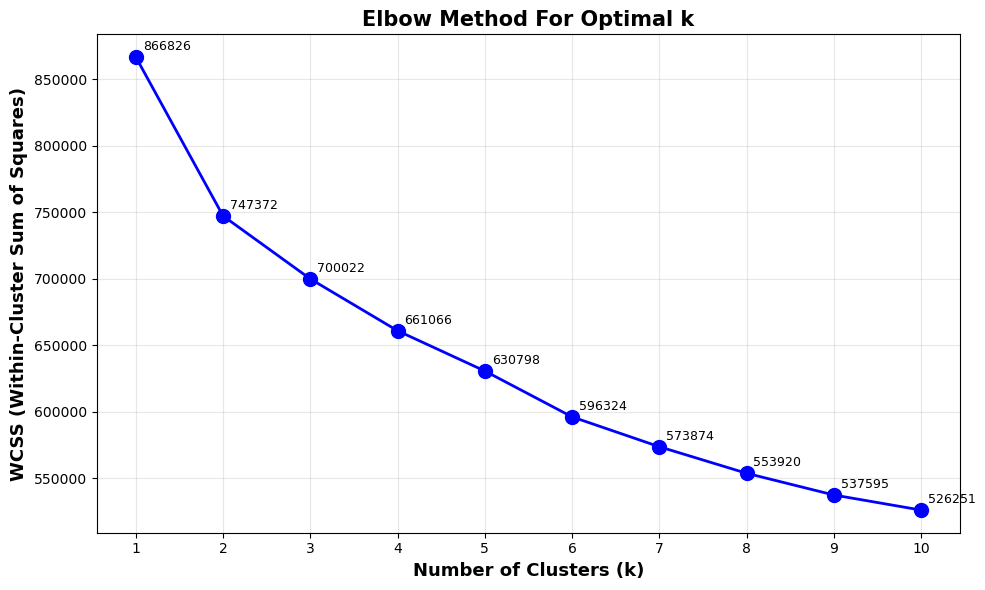


WCSS Decrease per k:
k=1 to k=2: Decrease = 119453.87
k=2 to k=3: Decrease = 47349.69
k=3 to k=4: Decrease = 38956.64
k=4 to k=5: Decrease = 30267.86
k=5 to k=6: Decrease = 34474.16
k=6 to k=7: Decrease = 22449.34
k=7 to k=8: Decrease = 19954.44
k=8 to k=9: Decrease = 16324.63
k=9 to k=10: Decrease = 11344.62


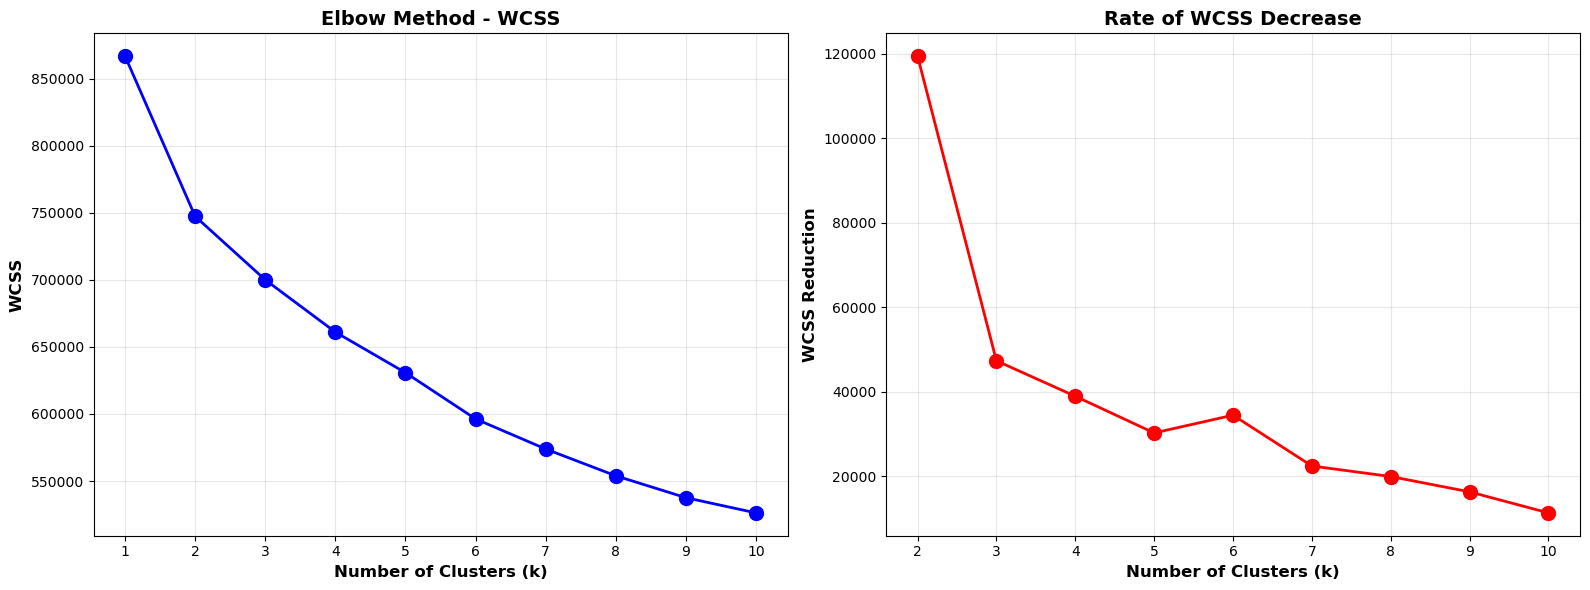

C:\Users\isaac\AppData\Local\Temp\ipykernel_40256\3535437477.py:89: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  distance = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)


Optimal k = 4 (using elbow method)

Applying K-Means with k=4...

Cluster distribution in training set:
Cluster_Group
0    10289
1    18086
2    16737
3     3045
Name: count, dtype: int64

Original features: 18
Features with clustering: 22
Added features: 4

Training model with k=4 cluster features

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     10130
         1.0       0.73      0.80      0.77     10509

    accuracy                           0.75     20639
   macro avg       0.75      0.75      0.75     20639
weighted avg       0.75      0.75      0.75     20639


Confusion Matrix:
[[7080 3050]
 [2099 8410]]

Final Results:
Recall:    0.8003
Accuracy:  0.7505
f1: 0.7656


In [243]:
# Split data first
X_original = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X_original, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate WCSS for different k values
wcss = []
K_range = range(1, 11)

print("\nCalculating WCSS for different k values...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
    print(f"k={k}: WCSS = {kmeans.inertia_:.2f}")

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (k)', fontsize=13, fontweight='bold')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=13, fontweight='bold')
plt.title('Elbow Method For Optimal k', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Add value annotations
for i, (k, w) in enumerate(zip(K_range, wcss)):
    plt.annotate(f'{w:.0f}', xy=(k, w), xytext=(5, 5), 
                textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Calculate rate of decrease
wcss_diff = np.diff(wcss)
wcss_diff_rate = np.diff(wcss_diff)

print("\nWCSS Decrease per k:")
for i, diff in enumerate(wcss_diff, start=2):
    print(f"k={i-1} to k={i}: Decrease = {-diff:.2f}")

# Visual elbow detection with dual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# WCSS elbow curve
ax1.plot(K_range, wcss, 'bo-', linewidth=2, markersize=10)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('WCSS', fontsize=12, fontweight='bold')
ax1.set_title('Elbow Method - WCSS', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(K_range)

# Rate of change
ax2.plot(list(K_range)[1:], -wcss_diff, 'ro-', linewidth=2, markersize=10)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax2.set_ylabel('WCSS Reduction', fontsize=12, fontweight='bold')
ax2.set_title('Rate of WCSS Decrease', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(list(K_range)[1:])

plt.tight_layout()
plt.show()

# Automated elbow detection
def find_elbow(wcss_values):
    """Find elbow using the maximum distance method"""
    x = np.array(range(len(wcss_values)))
    y = np.array(wcss_values)
    
    # Line from first to last point
    p1 = np.array([x[0], y[0]])
    p2 = np.array([x[-1], y[-1]])
    
    # Calculate distances from each point to the line
    distances = []
    for i in range(len(x)):
        p = np.array([x[i], y[i]])
        distance = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)
        distances.append(distance)
    
    elbow_idx = np.argmax(distances)
    return elbow_idx + 1

optimal_k = find_elbow(wcss)
print(f"Optimal k = {optimal_k} (using elbow method)")

# Apply K-Means with optimal k
print(f"\nApplying K-Means with k={optimal_k}...")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
train_clusters = kmeans_final.fit_predict(X_train_scaled)
test_clusters = kmeans_final.predict(X_test_scaled)

# Add cluster features
X_train_enriched = X_train.copy()
X_train_enriched['Cluster_Group'] = train_clusters

X_test_enriched = X_test.copy()
X_test_enriched['Cluster_Group'] = test_clusters

print(f"\nCluster distribution in training set:")
print(X_train_enriched['Cluster_Group'].value_counts().sort_index())

# One-hot encode clusters
X_train_final = pd.get_dummies(X_train_enriched, columns=['Cluster_Group'], 
                                prefix='Cluster', drop_first=False)
X_test_final = pd.get_dummies(X_test_enriched, columns=['Cluster_Group'], 
                               prefix='Cluster', drop_first=False)

# Align columns
X_train_final, X_test_final = X_train_final.align(X_test_final, join='left', 
                                                    axis=1, fill_value=0)

print(f"\nOriginal features: {X_train.shape[1]}")
print(f"Features with clustering: {X_train_final.shape[1]}")
print(f"Added features: {X_train_final.shape[1] - X_train.shape[1]}")

# Train and evaluate
print(f"\nTraining model with k={optimal_k} cluster features")

gb_optimized.fit(X_train_final, y_train)
y_pred = gb_optimized.predict(X_test_final)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nFinal Results:")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"f1: {f1_score(y_test, y_pred):.4f}")

**K-Means Clustering: Rationale and Why It Failed**
The Rationale for Using K-Means
K-means clustering was attempted as a feature engineering technique with several logical justifications:

1. Patient Subgroup Discovery
The hypothesis was that individuals with diabetes might naturally form distinct subgroups based on their health profiles:

Obese, sedentary diabetics (high BMI, low physical activity)
Older diabetics with cardiovascular complications (high age, high blood pressure, heart disease)
Younger pre-diabetics with poor diet but otherwise healthy (high cholesterol, normal BMI)

By identifying these clusters, the model could potentially learn different risk patterns for each subgroup rather than treating all patients as a homogeneous population.

2. Non-Linear Feature Interactions
K-means can capture complex, non-linear relationships between multiple features simultaneously. For example:

The combination of BMI=35 + Age=60 + HighBP=1 might form a high-risk cluster
This interaction pattern might be harder for the model to learn from individual features alone

The cluster assignment (e.g., "patient belongs to cluster 3") becomes a new categorical feature encoding these multi-dimensional patterns.
3. Risk Stratification
Different clusters might have dramatically different diabetes prevalence rates:

Cluster 1: 90% diabetes rate (very high risk group)
Cluster 2: 50% diabetes rate (moderate risk)
Cluster 3: 10% diabetes rate (low risk)

This stratification could theoretically help the model make sharper distinctions between risk groups.

Why it failed
Despite the logical rationale, K-means clustering might have failed to improve model performance for a few reasons:

1. The features that make people similar to K-means are not necessarily the features that predict diabetes.They could have been grouped together for other reasons which would confuse the model.

2. Redundant Information
The Gradient Boosting model already captures complex feature interactions through its tree structure:

Trees naturally learn rules like "IF BMI > 30 AND Age > 50 AND HighBP = 1 THEN high diabetes risk"
These interactions likely overlapped with what the K-means clusters represented,
Adding a compressed, less precise version of patterns that the model already learned

In [244]:
# Recall, accuracy and f1 did not improeve after adding cluster features.
# Therefore, I will not include cluster features in the final model.

In [245]:
df.duplicated().sum()

np.int64(1710)

In [246]:
df_dup = df.drop_duplicates(inplace=False)

X = df_dup.drop('Diabetes_binary', axis=1)
y = df_dup['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gb_optimized.fit(X_train, y_train)
y_pred = gb_optimized.predict(X_test)

print("--- Single Metrics ---")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}") 
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred):.4f}")

# Classification Report 
print("\n--- Report ---")
print(classification_report(y_test, y_pred))



--- Single Metrics ---
Recall:    0.8024
Accuracy:  0.7483
Precision: 0.7373
F1 Score:  0.7685
ROC AUC:   0.7460

--- Report ---
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      9648
         1.0       0.74      0.80      0.77     10478

    accuracy                           0.75     20126
   macro avg       0.75      0.75      0.75     20126
weighted avg       0.75      0.75      0.75     20126



Data duplicate removal was attempted based on standard machine learning concerns about overfitting and sample independence. 

The rationale was that duplicate records could cause the model to over-weight specific patterns, as the modal is tree-based, it could have potentially created splits optimized for these repeated examples rather than learning generalizable rules. 

However, duplicate removal failed because the dataset contained false duplicates rather than true duplicates. With only 17-21 mostly binary and categorical features, many different individuals naturally have identical feature values. For example, thousands of healthy 30-year-olds might share the same BMI, activity level, and disease status. These aren't data entry errors but genuinely different people who happen to match across all measured variables. Removing these legitimate training examples reduced the model's ability to learn population-wide patterns.

The removal disproportionately impacted common health profiles and removed critical information about population frequency. If 1,000 people share identical features, that reflects how common that health profile is in reality. Reducing this to a single representative example eliminates the model's ability to learn accurate diabetes prevalence rates for common profiles. This particularly harmed the minority class, as diabetic patients often share common risk profiles like high BMI and age, making them more likely to have matching feature combinations. The model ended up with fewer diabetic examples to learn from, directly reducing recall. The fundamental error I made was treating feature matches as duplicate records without unique patient identifiers to confirm they were actually the same person surveyed multiple times.

In [247]:
# Recall, accuracy and f1 did not improeve after removing duplicated data.
# Therefore, I will not include cluster features in the final model.

In [248]:
# The final dataset is ready! Now the model will be deployed onto streamlit

# Final model training and saving
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gb_optimized.fit(X_train, y_train)
y_pred = gb_optimized.predict(X_test)
print("--- Single Metrics ---")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
joblib.dump(gb_optimized, 'diabetes_model.pkl')

--- Single Metrics ---
Recall:    0.8072
Accuracy:  0.7517


['diabetes_model.pkl']